In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data related to direct marketing campaigns of a Portuguese banking institution.
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [2]:
df=pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Context:
Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

In [3]:
df.shape

(45211, 17)

In [4]:
df['Target'].unique()

array(['no', 'yes'], dtype=object)

In [5]:
# Check null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

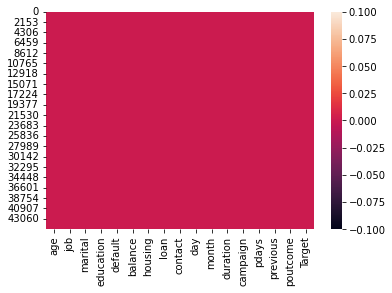

In [6]:
# Visualise null values
sns.heatmap(df.isnull())
plt.show()

In [7]:
# Check data type
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [8]:
# check duplicates
df.duplicated().sum()

0

In [9]:
# Check how many categorical samples are there in column 'Target'
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

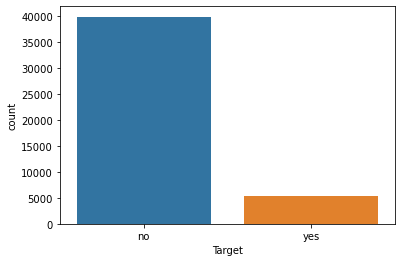

In [10]:
# Visualise count plot
sns.countplot(data=df,x='Target')
plt.show()

In [11]:
# Now Split DataSet into 2 parts
# Numeric type and Categorical type
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [12]:
df_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [13]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [14]:
# To convert categorical type data into numeric type.
# Use Label Encoder
from sklearn.preprocessing import LabelEncoder

In [15]:
for col in df_cat:
    # create an object of LabelEncoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [16]:
df_cat.dtypes

job          int64
marital      int64
education    int64
default      int64
housing      int64
loan         int64
contact      int64
month        int64
poutcome     int64
Target       int64
dtype: object

In [17]:
# After applying LabelEncoder we concatenate df_cat and df_num.
df_new=pd.concat([df_num,df_cat],axis=1)

In [18]:
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [30]:
# Split dataset in input and output
X=df_new.drop('Target',axis=1)    # input
Y=df_new['Target']                # output

In [31]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3


In [32]:
# Now Train_test_split
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.3,random_state=1)

In [33]:
# Now applying Scaling on input data X_train and X_test before we train the model
# Apply StandardScaler on input data training and testing
from sklearn.preprocessing import StandardScaler

In [34]:
# Create an object of StandardScaler class
ss=StandardScaler()
#means apply standard scaler for X_train and X_test data

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [37]:
X_train

array([[ 0.09881684,  0.42807061, -0.09973222, ...,  1.49797145,
         0.83078232,  0.44805792],
       [-0.37151499,  0.31707647,  0.49973948, ...,  1.49797145,
         0.16768173,  0.44805792],
       [-0.84184683, -0.14337018,  0.14005646, ..., -0.7181473 ,
        -1.82162004,  0.44805792],
       ...,
       [-0.93591319, -0.47384628,  1.09921117, ..., -0.7181473 ,
        -1.49006974,  0.44805792],
       [ 0.85134778, -0.47205606, -1.53846429, ...,  1.49797145,
        -0.16386856,  0.44805792],
       [-0.46558136,  1.65938947,  0.73952815, ..., -0.7181473 ,
         1.82543321, -0.55964522]])

In [38]:
# Create the model of LofisticRegression, Why?
# Because we predict the output in Yes/no format as we have a classification type dataset.
# # Use baseline model : LogisticRegression
from sklearn.linear_model import LogisticRegression

In [39]:
# Create an object of LogisticRegression class
lr=LogisticRegression()

In [40]:
# To train the model with 70% data use inbuilt method fit()
lr.fit(X_train,Y_train)

LogisticRegression()

In [41]:
# Test the model with 30% data use inbuilt method predict().
Y_pred=lr.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
# Create a Dictionary
dict={'Actual Output':Y_test,'Predicted Output':Y_pred}
df1=pd.DataFrame(dict)
df1.head(26)

,Actual Output,Predicted Output
6149,0,0
12403,0,0
21645,0,0
29580,0,0
31245,0,0
32032,0,0
18295,0,0
42774,1,0
26345,0,0
31747,0,0


In [43]:
# Check accuracy of model use inbuilt method score() of LogisticRegression.
lr.score(X_test,Y_test)      # Score always varies between 0-1

0.8906373431920878

In [44]:
# Generation Classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27909
           1       0.61      0.20      0.30      3738

    accuracy                           0.89     31647
   macro avg       0.76      0.59      0.62     31647
weighted avg       0.87      0.89      0.87     31647



In [46]:
print(confusion_matrix(Y_test,Y_pred))

[[27435   474]
 [ 2987   751]]


# Report
This model is not accurate as the value of 1 is 98%.
#Clearly Data is imbalance #here, there are 2 classes : first class : 0 means Target says 'No #and second class : 1 means Target says 'Yes #here majority class : 0(39922 samples) and minority class : 0(5289 samples) #Here we have to balance of both classes #means here we have to use sampling technique for balance of 2 classes #There are 2 types of sampling technique :- #1. RandomOverSampling : in this sampling , converts minority class into #majority class #2. RandonUnderSampling : in this sampling , converts majority class into #minority class

# First install inbuilt package imblearn
#!pip install imblearn

In [47]:
#RandomOverSampler : inbuilt class : to increase means create duplicate 
#records of minority class which equal to majority class
from imblearn.over_sampling import RandomOverSampler

In [48]:
# Check how many samples of class 0,1 and 2 class in Y_train
Y_train.value_counts()

0    12013
1     1551
Name: Target, dtype: int64

In [49]:
# Now apply RandomOverSampler class.
# Create an object of RandomOverSampler class
ros=RandomOverSampler(random_state=1)

In [50]:
# Use inbuilt method fit_resample() of RandomOverSampler class
X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train)

In [51]:
# Check 
Y_train_ros.value_counts()

0    12013
1    12013
Name: Target, dtype: int64

In [52]:
# Now check how many samples of class 0,1 and 2 class in Y_test
Y_test.value_counts()

0    27909
1     3738
Name: Target, dtype: int64

In [53]:
# Now apply RandomOverSampler on testing data
X_test_ros,Y_test_ros=ros.fit_resample(X_test,Y_test)

In [54]:
# Again check
Y_test_ros.value_counts()

0    27909
1    27909
Name: Target, dtype: int64

In [55]:
# Create a function
def create_model(model):
  model.fit(X_train_ros,Y_train_ros)      # train the model with 70% data
  Y_pred=model.predict(X_test_ros)        # test the model with 30% data
  print(classification_report(Y_test_ros,Y_pred))  # generate report
  print(confusion_matrix(Y_test_ros,Y_pred))
  return model

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Use baseline model LogisticRegression

In [57]:
#model perform with Logistic regression class
from sklearn.linear_model import LogisticRegression

In [58]:
# create an object of LogisticRegression class
lr=LogisticRegression()

In [59]:
# call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     27909
           1       0.81      0.80      0.80     27909

    accuracy                           0.80     55818
   macro avg       0.80      0.80      0.80     55818
weighted avg       0.80      0.80      0.80     55818

[[22545  5364]
 [ 5523 22386]]


# Now doing with Decisiom Tree for better accuracy

In [60]:
#Next  apply DecisionTreeClassifier class 
#perform dataset with the help of DecisionTreeClassifier 
#call DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

In [61]:
#create the object of DecisionTreeClassifier class
#dt=DecisionTreeClassifier(random_state=1) #by default Gini index 
dt=DecisionTreeClassifier(random_state=1) 
#means find loss : 1-P*2-Q*2
# call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.61      0.93      0.74     27909
           1       0.86      0.40      0.54     27909

    accuracy                           0.67     55818
   macro avg       0.73      0.67      0.64     55818
weighted avg       0.73      0.67      0.64     55818

[[26063  1846]
 [16772 11137]]


In [62]:
#show the information gain of all input feature
IG=dt.feature_importances_ #featuee importance inbuilt method of Decisiom Tre classfifer

print('information Gain :',IG)

information Gain : [0.07223178 0.09814165 0.06482429 0.34579607 0.02459754 0.04187186
 0.02222844 0.03765264 0.01097609 0.016762   0.00045652 0.04285999
 0.01244357 0.09118704 0.08928487 0.02868564]


In [63]:
X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [64]:
#create dictionary
dict={'input':X.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False )#descending order according to iG

,input,IG
3,duration,0.345796
1,balance,0.098142
13,contact,0.091187
14,month,0.089285
0,age,0.072232
2,day,0.064824
11,housing,0.042860
5,pdays,0.041872
7,job,0.037653
15,poutcome,0.028686


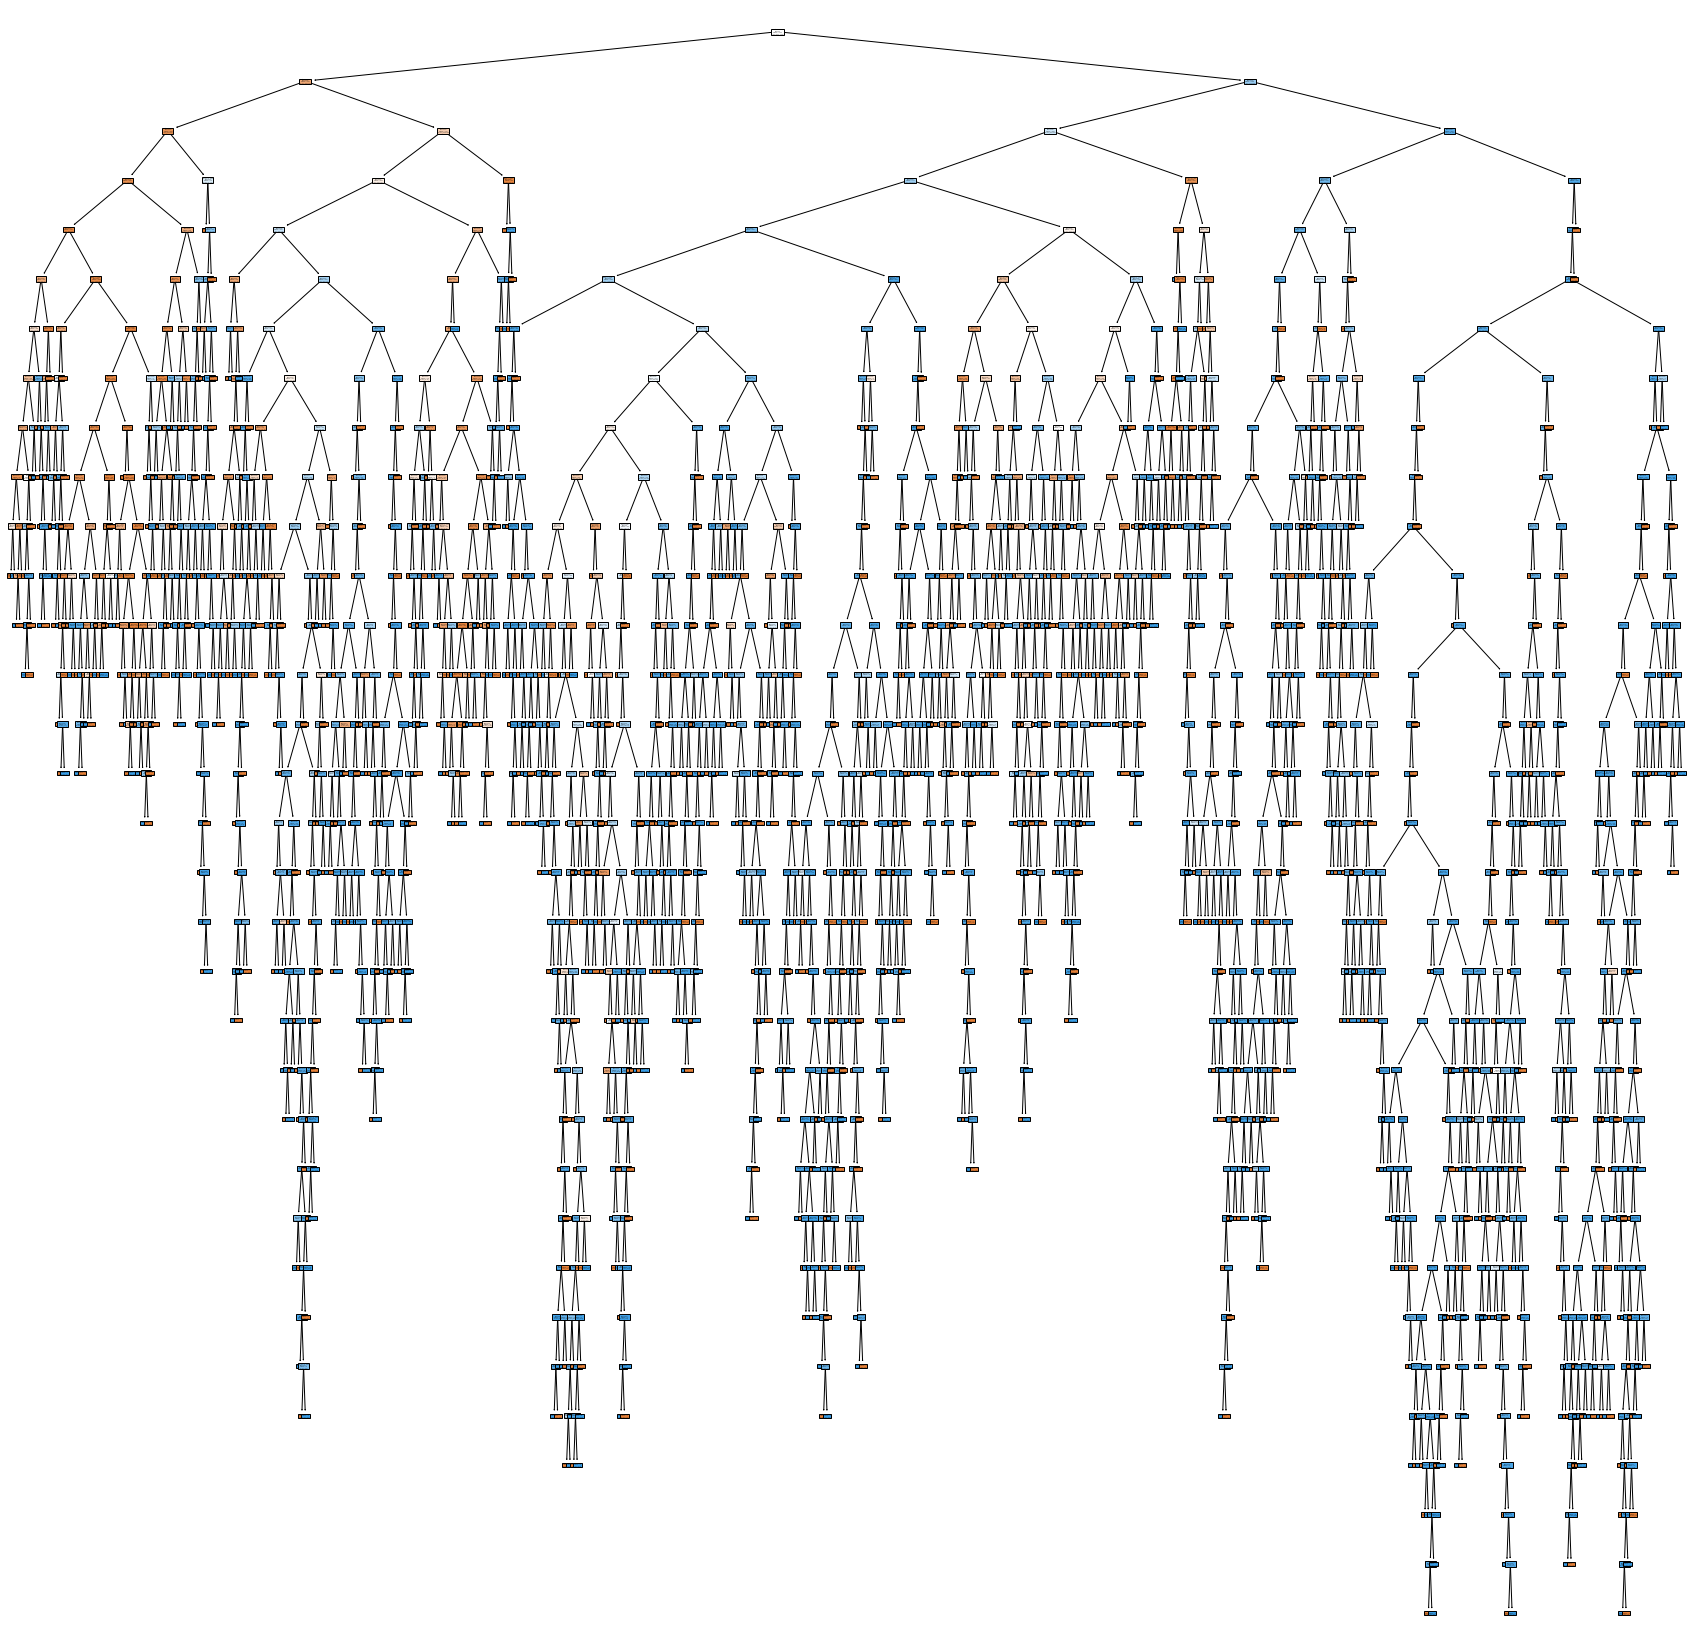

In [66]:
#create the tree 
from sklearn import tree
features=X.columns #input features
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt,feature_names=features,filled=True)

# pruning technique¶
#max depth(reduce overfitting) #pruning technique #max_depth : - #Note : max_depth can not more than 8 #1. max_depth parameter ##create object of DecisionTreeClassifier class and passing the parameter #max_depth# 

In [71]:
#create objet of Decisiom TREE classifier class and passing the parameter
#maxdepth

dt1=DecisionTreeClassifier(random_state=1,max_depth=3)

In [72]:
#call the function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.80      0.71      0.75     27909
           1       0.74      0.82      0.78     27909

    accuracy                           0.77     55818
   macro avg       0.77      0.77      0.76     55818
weighted avg       0.77      0.77      0.76     55818

[[19936  7973]
 [ 5136 22773]]


In [73]:
#create objet of Decisiom TREE classifier class and passing the parameter
#maxdepth

dt2=DecisionTreeClassifier(random_state=1,max_depth=6)

In [74]:
# call the function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     27909
           1       0.78      0.81      0.80     27909

    accuracy                           0.79     55818
   macro avg       0.79      0.79      0.79     55818
weighted avg       0.79      0.79      0.79     55818

[[21688  6221]
 [ 5308 22601]]


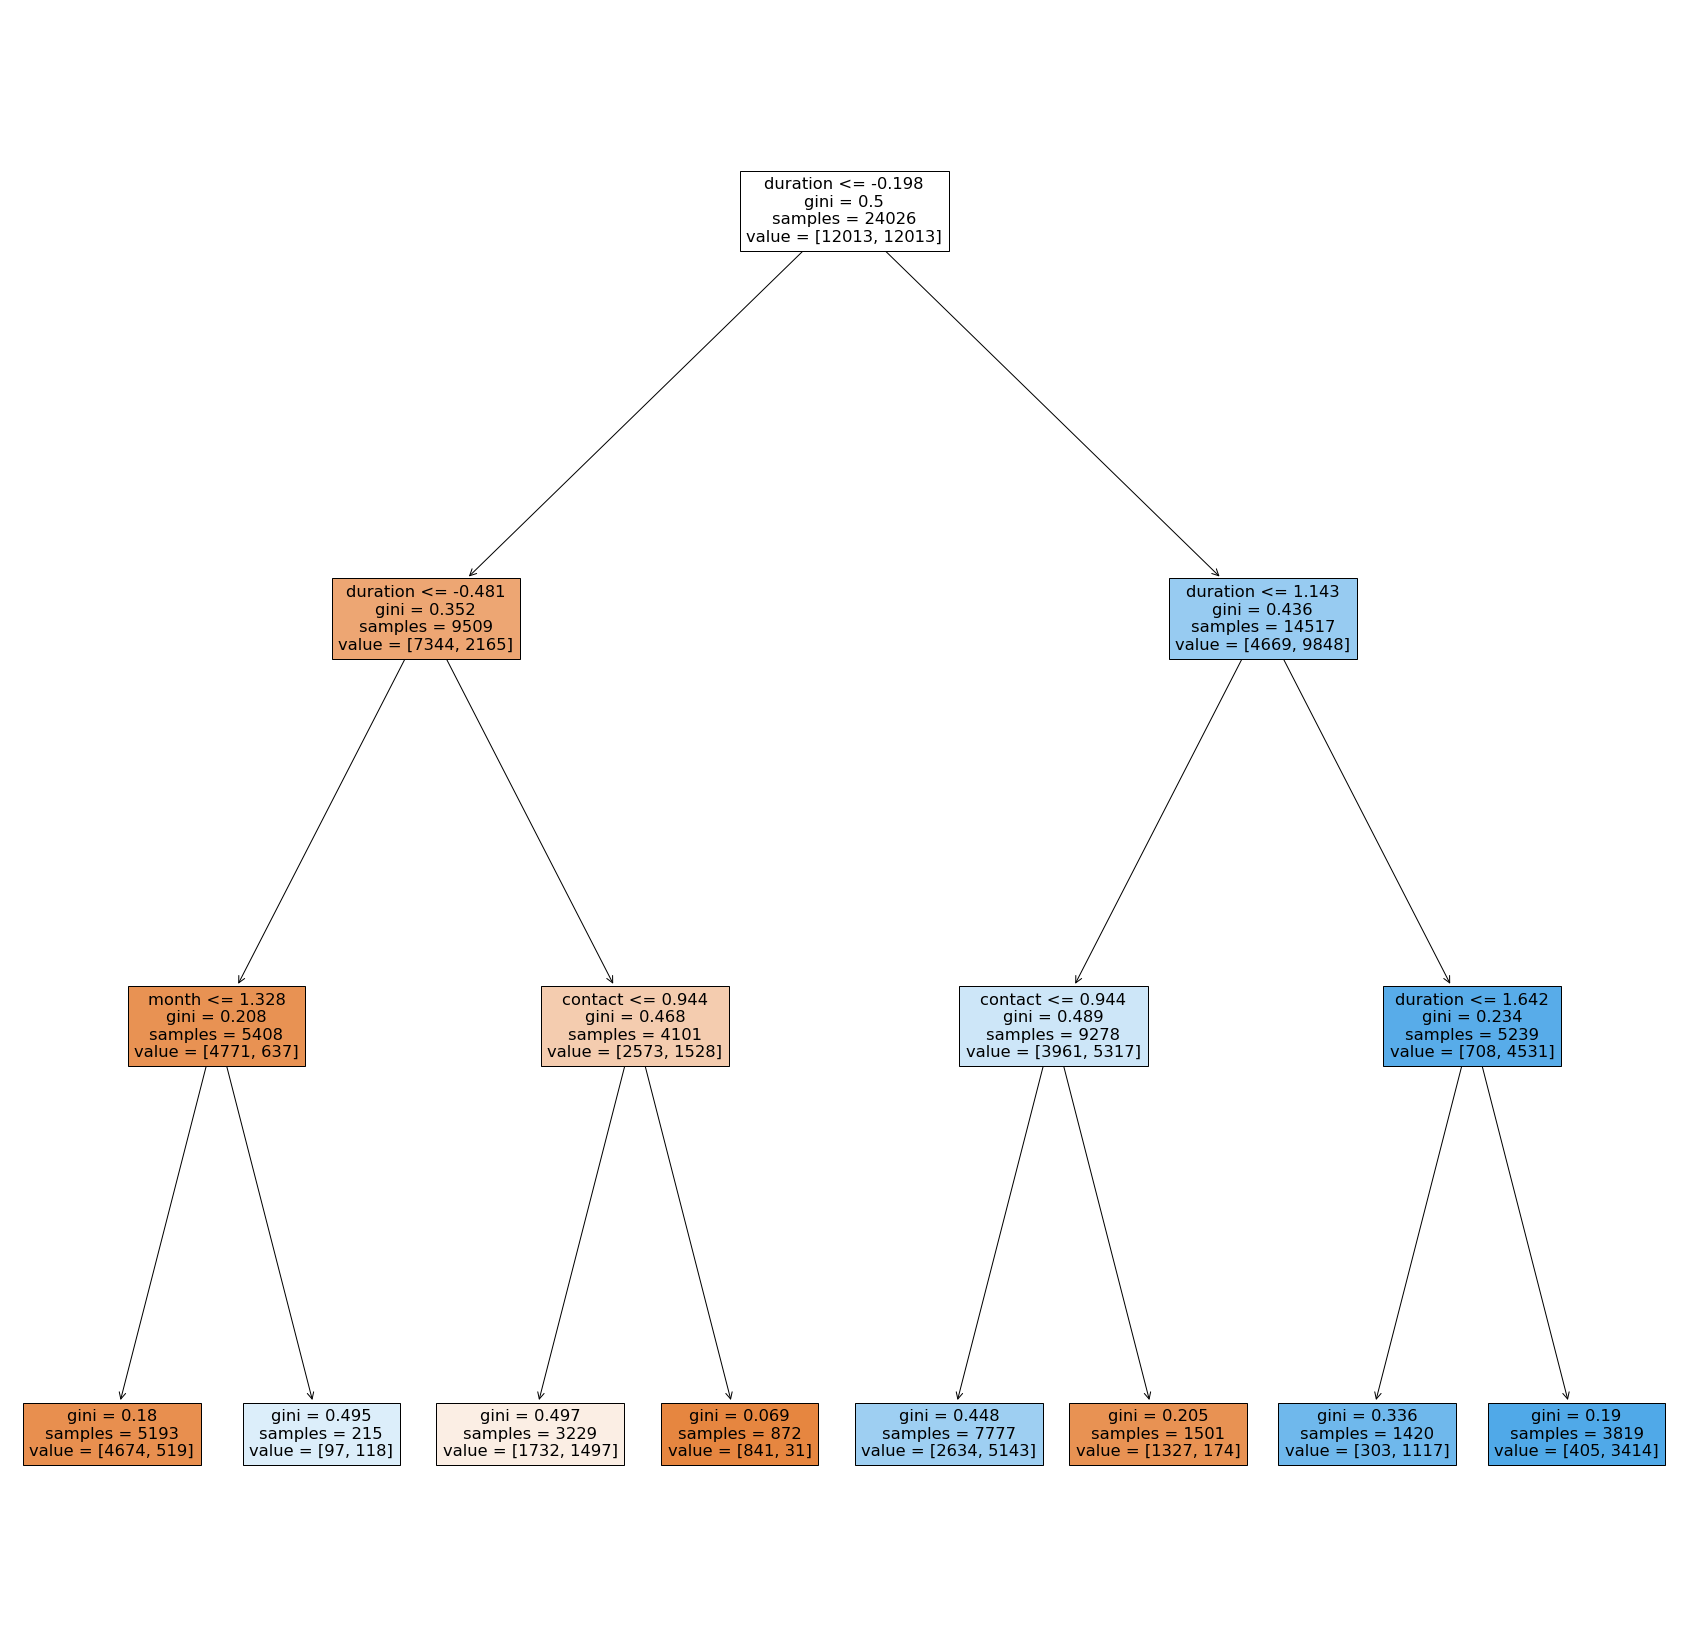

In [75]:
#create the tree 
from sklearn import tree
features=X.columns #input features
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [77]:
#create a dictrony IG information gain 
IG=dt1.feature_importances_
dict={'Input':X.columns,'IG':IG} 
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False) #decending order according to IG


,Input,IG
3,duration,0.748906
13,contact,0.231808
14,month,0.019285
0,age,0.000000
1,balance,0.000000
2,day,0.000000
4,campaign,0.000000
5,pdays,0.000000
6,previous,0.000000
7,job,0.000000


# 2nd purning technique : min_samples_leaf
#min_samples_leaf =45 or more means not less than=45 and max=100 ##create object of DecisionTreeClassifier class #leaf node means no child

In [78]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)

In [79]:
#call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     27909
           1       0.82      0.78      0.80     27909

    accuracy                           0.80     55818
   macro avg       0.81      0.80      0.80     55818
weighted avg       0.81      0.80      0.80     55818

[[23244  4665]
 [ 6245 21664]]


In [80]:
# Check Min Sample Leaf at different levels

for i in range(45,100,5):
  print('Min Sample Leaf:-',i)
  dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
  #call function
  dt2=create_model(dt2)

Min Sample Leaf:- 45
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     27909
           1       0.82      0.78      0.80     27909

    accuracy                           0.80     55818
   macro avg       0.81      0.80      0.80     55818
weighted avg       0.81      0.80      0.80     55818

[[23244  4665]
 [ 6245 21664]]
Min Sample Leaf:- 50
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     27909
           1       0.82      0.79      0.80     27909

    accuracy                           0.81     55818
   macro avg       0.81      0.81      0.81     55818
weighted avg       0.81      0.81      0.81     55818

[[23010  4899]
 [ 5871 22038]]
Min Sample Leaf:- 55
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     27909
           1       0.82      0.78      0.80     27909

    accuracy                           0.81     55818
   

In [81]:
for i in range(45,100,5):
  print('Min Sample Leaf:-',i)
  dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy')
  # By default Gini
  #call function
  dt2=create_model(dt2)

Min Sample Leaf:- 45
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     27909
           1       0.82      0.78      0.80     27909

    accuracy                           0.80     55818
   macro avg       0.81      0.80      0.80     55818
weighted avg       0.81      0.80      0.80     55818

[[23150  4759]
 [ 6164 21745]]
Min Sample Leaf:- 50
              precision    recall  f1-score   support

           0       0.80      0.83      0.81     27909
           1       0.82      0.79      0.80     27909

    accuracy                           0.81     55818
   macro avg       0.81      0.81      0.81     55818
weighted avg       0.81      0.81      0.81     55818

[[23060  4849]
 [ 5929 21980]]
Min Sample Leaf:- 55
              precision    recall  f1-score   support

           0       0.79      0.84      0.81     27909
           1       0.83      0.78      0.80     27909

    accuracy                           0.81     55818
   

In [82]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=70,criterion='entropy') 
#change to entropy
#call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82     27909
           1       0.83      0.80      0.82     27909

    accuracy                           0.82     55818
   macro avg       0.82      0.82      0.82     55818
weighted avg       0.82      0.82      0.82     55818

[[23420  4489]
 [ 5518 22391]]


# Use Ensembling Technique
#RandomForestTree ''' Train the dataset on multiple decisiontreeclassifier algorithm ''' #Random Forest Tree #call Random Forest Tree from package

#ensemble means to train the same dataset from #multiple algorithm

# RandomForestTree

In [84]:
X.shape

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
# Create object of RandomForestClassifier
for i in range(1,200):
  rfc=RandomForestClassifier(n_estimators=i,max_features=10,random_state=1)
  # by default gini
  # call function
  print("No. of Features : ",i)
  rfc=create_model(rfc)
# here n_estimators means take how many no. of decisiontree 
# max_features means take how many input

No. of Features :  1
              precision    recall  f1-score   support

           0       0.64      0.91      0.75     27909
           1       0.84      0.48      0.61     27909

    accuracy                           0.70     55818
   macro avg       0.74      0.70      0.68     55818
weighted avg       0.74      0.70      0.68     55818

[[25418  2491]
 [14434 13475]]
No. of Features :  2
              precision    recall  f1-score   support

           0       0.58      0.96      0.73     27909
           1       0.89      0.31      0.46     27909

    accuracy                           0.64     55818
   macro avg       0.74      0.64      0.59     55818
weighted avg       0.74      0.64      0.59     55818

[[26829  1080]
 [19184  8725]]
No. of Features :  3
              precision    recall  f1-score   support

           0       0.65      0.93      0.76     27909
           1       0.88      0.49      0.63     27909

    accuracy                           0.71     55818
   

              precision    recall  f1-score   support

           0       0.66      0.94      0.78     27909
           1       0.90      0.51      0.65     27909

    accuracy                           0.73     55818
   macro avg       0.78      0.73      0.71     55818
weighted avg       0.78      0.73      0.71     55818

[[26358  1551]
 [13677 14232]]
No. of Features :  24
              precision    recall  f1-score   support

           0       0.65      0.95      0.77     27909
           1       0.91      0.48      0.63     27909

    accuracy                           0.72     55818
   macro avg       0.78      0.72      0.70     55818
weighted avg       0.78      0.72      0.70     55818

[[26503  1406]
 [14376 13533]]
No. of Features :  25
              precision    recall  f1-score   support

           0       0.66      0.95      0.78     27909
           1       0.90      0.51      0.65     27909

    accuracy                           0.73     55818
   macro avg       0.7

              precision    recall  f1-score   support

           0       0.66      0.95      0.78     27909
           1       0.91      0.52      0.66     27909

    accuracy                           0.73     55818
   macro avg       0.79      0.73      0.72     55818
weighted avg       0.79      0.73      0.72     55818

[[26419  1490]
 [13368 14541]]
No. of Features :  46
              precision    recall  f1-score   support

           0       0.66      0.95      0.78     27909
           1       0.91      0.50      0.65     27909

    accuracy                           0.73     55818
   macro avg       0.78      0.73      0.71     55818
weighted avg       0.78      0.73      0.71     55818

[[26481  1428]
 [13823 14086]]
No. of Features :  47
              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0.7

              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0.79      0.74      0.73     55818
weighted avg       0.79      0.74      0.73     55818

[[26410  1499]
 [13159 14750]]
No. of Features :  68
              precision    recall  f1-score   support

           0       0.66      0.95      0.78     27909
           1       0.91      0.52      0.66     27909

    accuracy                           0.73     55818
   macro avg       0.79      0.73      0.72     55818
weighted avg       0.79      0.73      0.72     55818

[[26455  1454]
 [13452 14457]]
No. of Features :  69
              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0.7

              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0.79      0.74      0.73     55818
weighted avg       0.79      0.74      0.73     55818

[[26416  1493]
 [13166 14743]]
No. of Features :  90
              precision    recall  f1-score   support

           0       0.66      0.95      0.78     27909
           1       0.91      0.52      0.66     27909

    accuracy                           0.73     55818
   macro avg       0.79      0.73      0.72     55818
weighted avg       0.79      0.73      0.72     55818

[[26453  1456]
 [13408 14501]]
No. of Features :  91
              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0.7

              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0.79      0.74      0.72     55818
weighted avg       0.79      0.74      0.72     55818

[[26410  1499]
 [13206 14703]]
No. of Features :  112
              precision    recall  f1-score   support

           0       0.66      0.95      0.78     27909
           1       0.91      0.52      0.66     27909

    accuracy                           0.73     55818
   macro avg       0.79      0.73      0.72     55818
weighted avg       0.79      0.73      0.72     55818

[[26435  1474]
 [13333 14576]]
No. of Features :  113
              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0

              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0.79      0.74      0.73     55818
weighted avg       0.79      0.74      0.73     55818

[[26413  1496]
 [13139 14770]]
No. of Features :  134
              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.52      0.66     27909

    accuracy                           0.74     55818
   macro avg       0.79      0.74      0.72     55818
weighted avg       0.79      0.74      0.72     55818

[[26431  1478]
 [13282 14627]]
No. of Features :  135
              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0

              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0.79      0.74      0.73     55818
weighted avg       0.79      0.74      0.73     55818

[[26417  1492]
 [13105 14804]]
No. of Features :  156
              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0.79      0.74      0.73     55818
weighted avg       0.79      0.74      0.73     55818

[[26436  1473]
 [13192 14717]]
No. of Features :  157
              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0

              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0.79      0.74      0.73     55818
weighted avg       0.79      0.74      0.73     55818

[[26415  1494]
 [13119 14790]]
No. of Features :  178
              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0.79      0.74      0.72     55818
weighted avg       0.79      0.74      0.72     55818

[[26433  1476]
 [13211 14698]]
No. of Features :  179
              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0

              precision    recall  f1-score   support

           0       0.67      0.95      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0.79      0.74      0.72     55818
weighted avg       0.79      0.74      0.72     55818

[[26410  1499]
 [13200 14709]]


In [89]:
rfc=RandomForestClassifier(n_estimators=15,max_features=5,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.65      0.95      0.77     27909
           1       0.91      0.50      0.64     27909

    accuracy                           0.72     55818
   macro avg       0.78      0.72      0.71     55818
weighted avg       0.78      0.72      0.71     55818

[[26483  1426]
 [14007 13902]]


In [90]:
rfc=RandomForestClassifier(n_estimators=11,max_features=5,random_state=1,criterion='entropy')
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.67      0.94      0.78     27909
           1       0.91      0.53      0.67     27909

    accuracy                           0.74     55818
   macro avg       0.79      0.74      0.73     55818
weighted avg       0.79      0.74      0.73     55818

[[26369  1540]
 [13039 14870]]


# Boosting Tech = 1. Gradient Boost technuique

In [91]:
#Boosting Technique  : it is also Ensembling tech .
#1. gradient Boost technuique : second tech. of Boosting Ensembling technique 
# GB  : - its create a fully grown tree.this algorithm is focus on short comings 
#short comings means error

In [92]:
# Call GradientBoostingClassifier class from following package.
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
# Create an object of GradientBoosting class.
for i in range(1,100):
    # create an object of GradientBoostingClassifier class
    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
    # Call the function
    print('No of Decision Tree : ',i)
    gbc=create_model(gbc)

No of Decision Tree :  1
              precision    recall  f1-score   support

           0       0.80      0.71      0.75     27909
           1       0.74      0.82      0.78     27909

    accuracy                           0.77     55818
   macro avg       0.77      0.77      0.76     55818
weighted avg       0.77      0.77      0.76     55818

[[19936  7973]
 [ 5136 22773]]
No of Decision Tree :  2
              precision    recall  f1-score   support

           0       0.83      0.71      0.77     27909
           1       0.75      0.85      0.80     27909

    accuracy                           0.78     55818
   macro avg       0.79      0.78      0.78     55818
weighted avg       0.79      0.78      0.78     55818

[[19868  8041]
 [ 4108 23801]]
No of Decision Tree :  3
              precision    recall  f1-score   support

           0       0.83      0.72      0.77     27909
           1       0.75      0.85      0.80     27909

    accuracy                           0.78  

              precision    recall  f1-score   support

           0       0.84      0.78      0.81     27909
           1       0.79      0.86      0.82     27909

    accuracy                           0.82     55818
   macro avg       0.82      0.82      0.82     55818
weighted avg       0.82      0.82      0.82     55818

[[21731  6178]
 [ 3991 23918]]
No of Decision Tree :  24
              precision    recall  f1-score   support

           0       0.84      0.78      0.81     27909
           1       0.80      0.86      0.83     27909

    accuracy                           0.82     55818
   macro avg       0.82      0.82      0.82     55818
weighted avg       0.82      0.82      0.82     55818

[[21782  6127]
 [ 3998 23911]]
No of Decision Tree :  25
              precision    recall  f1-score   support

           0       0.84      0.78      0.81     27909
           1       0.80      0.85      0.83     27909

    accuracy                           0.82     55818
   macro avg  

              precision    recall  f1-score   support

           0       0.85      0.82      0.83     27909
           1       0.82      0.85      0.84     27909

    accuracy                           0.83     55818
   macro avg       0.83      0.83      0.83     55818
weighted avg       0.83      0.83      0.83     55818

[[22753  5156]
 [ 4084 23825]]
No of Decision Tree :  46
              precision    recall  f1-score   support

           0       0.85      0.82      0.83     27909
           1       0.82      0.85      0.84     27909

    accuracy                           0.84     55818
   macro avg       0.84      0.84      0.84     55818
weighted avg       0.84      0.84      0.84     55818

[[22803  5106]
 [ 4097 23812]]
No of Decision Tree :  47
              precision    recall  f1-score   support

           0       0.85      0.82      0.83     27909
           1       0.82      0.85      0.84     27909

    accuracy                           0.84     55818
   macro avg  

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     27909
           1       0.83      0.86      0.84     27909

    accuracy                           0.84     55818
   macro avg       0.84      0.84      0.84     55818
weighted avg       0.84      0.84      0.84     55818

[[23041  4868]
 [ 3954 23955]]
No of Decision Tree :  68
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     27909
           1       0.83      0.86      0.85     27909

    accuracy                           0.84     55818
   macro avg       0.84      0.84      0.84     55818
weighted avg       0.84      0.84      0.84     55818

[[23033  4876]
 [ 3919 23990]]
No of Decision Tree :  69
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     27909
           1       0.83      0.86      0.85     27909

    accuracy                           0.84     55818
   macro avg  

              precision    recall  f1-score   support

           0       0.86      0.83      0.85     27909
           1       0.84      0.86      0.85     27909

    accuracy                           0.85     55818
   macro avg       0.85      0.85      0.85     55818
weighted avg       0.85      0.85      0.85     55818

[[23288  4621]
 [ 3781 24128]]
No of Decision Tree :  90
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     27909
           1       0.84      0.86      0.85     27909

    accuracy                           0.85     55818
   macro avg       0.85      0.85      0.85     55818
weighted avg       0.85      0.85      0.85     55818

[[23289  4620]
 [ 3774 24135]]
No of Decision Tree :  91
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     27909
           1       0.84      0.86      0.85     27909

    accuracy                           0.85     55818
   macro avg  

In [94]:
#14   0=77 1=86
# create an object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(random_state=1,n_estimators=15)
# Call the function
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80     27909
           1       0.78      0.86      0.82     27909

    accuracy                           0.81     55818
   macro avg       0.81      0.81      0.81     55818
weighted avg       0.81      0.81      0.81     55818

[[21361  6548]
 [ 4008 23901]]


# 2. ADA Boosting : Adaptor Boosting

In [95]:
from sklearn.ensemble import AdaBoostClassifier

In [96]:
# Create an object of AdaBoostClassifier class.
ada=AdaBoostClassifier(random_state=1,n_estimators=3)
# call the function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75     27909
           1       0.74      0.81      0.77     27909

    accuracy                           0.76     55818
   macro avg       0.77      0.76      0.76     55818
weighted avg       0.77      0.76      0.76     55818

[[20151  7758]
 [ 5383 22526]]


In [97]:
# Create an object of AdaBoostClassifier class.
ada3=AdaBoostClassifier(random_state=1,n_estimators=14)
# call the function
ada3=create_model(ada3)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     27909
           1       0.80      0.80      0.80     27909

    accuracy                           0.80     55818
   macro avg       0.80      0.80      0.80     55818
weighted avg       0.80      0.80      0.80     55818

[[22138  5771]
 [ 5496 22413]]


In [98]:
# Check Information gain of all inputs using inbuilt method 
# feature_importances_
ada.feature_importances_

array([0.        , 0.        , 0.        , 0.66666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       0.        ])

In [99]:
# Show information gain of all inputs.
IG=ada.feature_importances_
dict={'Input':X.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
3,duration,0.666667
13,contact,0.333333
0,age,0.000000
1,balance,0.000000
2,day,0.000000
4,campaign,0.000000
5,pdays,0.000000
6,previous,0.000000
7,job,0.000000
8,marital,0.000000


# 3. Extreme Gradient Boosting:- XGB Boosting

In [100]:
# Extreme Gradient Boosting:- XGB Boosting
#3. Extreame Gradient Boosting  : 3rd technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
#why call better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .

#!pip install xgboost

In [101]:
from xgboost import XGBClassifier

In [106]:
# Create object of class XGBClassifier
for i in range(1,101):
    xgc=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)
    # call function
    print('No. of estimators : ',i)
    xgc=create_model(xgc)

No. of estimators :  1
              precision    recall  f1-score   support

           0       0.81      0.77      0.79     27909
           1       0.78      0.82      0.80     27909

    accuracy                           0.79     55818
   macro avg       0.79      0.79      0.79     55818
weighted avg       0.79      0.79      0.79     55818

[[21549  6360]
 [ 5126 22783]]
No. of estimators :  2
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     27909
           1       0.82      0.78      0.80     27909

    accuracy                           0.80     55818
   macro avg       0.80      0.80      0.80     55818
weighted avg       0.80      0.80      0.80     55818

[[23160  4749]
 [ 6188 21721]]
No. of estimators :  3
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     27909
           1       0.81      0.83      0.82     27909

    accuracy                           0.81     558

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     27909
           1       0.86      0.83      0.84     27909

    accuracy                           0.85     55818
   macro avg       0.85      0.85      0.85     55818
weighted avg       0.85      0.85      0.85     55818

[[24273  3636]
 [ 4868 23041]]
No. of estimators :  24
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     27909
           1       0.86      0.82      0.84     27909

    accuracy                           0.85     55818
   macro avg       0.85      0.85      0.85     55818
weighted avg       0.85      0.85      0.85     55818

[[24296  3613]
 [ 4910 22999]]
No. of estimators :  25
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     27909
           1       0.87      0.82      0.84     27909

    accuracy                           0.85     55818
   macro avg      

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     27909
           1       0.87      0.78      0.83     27909

    accuracy                           0.84     55818
   macro avg       0.84      0.84      0.83     55818
weighted avg       0.84      0.84      0.83     55818

[[24771  3138]
 [ 6062 21847]]
No. of estimators :  46
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     27909
           1       0.87      0.78      0.82     27909

    accuracy                           0.83     55818
   macro avg       0.84      0.83      0.83     55818
weighted avg       0.84      0.83      0.83     55818

[[24786  3123]
 [ 6147 21762]]
No. of estimators :  47
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     27909
           1       0.87      0.78      0.82     27909

    accuracy                           0.83     55818
   macro avg      

              precision    recall  f1-score   support

           0       0.78      0.90      0.84     27909
           1       0.88      0.75      0.81     27909

    accuracy                           0.82     55818
   macro avg       0.83      0.82      0.82     55818
weighted avg       0.83      0.82      0.82     55818

[[25112  2797]
 [ 7072 20837]]
No. of estimators :  68
              precision    recall  f1-score   support

           0       0.78      0.90      0.84     27909
           1       0.88      0.75      0.81     27909

    accuracy                           0.82     55818
   macro avg       0.83      0.82      0.82     55818
weighted avg       0.83      0.82      0.82     55818

[[25121  2788]
 [ 7074 20835]]
No. of estimators :  69
              precision    recall  f1-score   support

           0       0.78      0.90      0.84     27909
           1       0.88      0.75      0.81     27909

    accuracy                           0.82     55818
   macro avg      

              precision    recall  f1-score   support

           0       0.77      0.91      0.83     27909
           1       0.89      0.73      0.80     27909

    accuracy                           0.82     55818
   macro avg       0.83      0.82      0.82     55818
weighted avg       0.83      0.82      0.82     55818

[[25368  2541]
 [ 7653 20256]]
No. of estimators :  90
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     27909
           1       0.89      0.72      0.80     27909

    accuracy                           0.82     55818
   macro avg       0.83      0.82      0.82     55818
weighted avg       0.83      0.82      0.82     55818

[[25372  2537]
 [ 7675 20234]]
No. of estimators :  91
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     27909
           1       0.89      0.72      0.80     27909

    accuracy                           0.82     55818
   macro avg      

In [107]:
#8   0=83  1=85
xgc=XGBClassifier(n_estimators=8,random_state=1,reg_alpha=1)
# call function
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     27909
           1       0.83      0.85      0.84     27909

    accuracy                           0.84     55818
   macro avg       0.84      0.84      0.84     55818
weighted avg       0.84      0.84      0.84     55818

[[23025  4884]
 [ 4259 23650]]


# support vector

In [108]:
# Use SVM : support vector machine : this is a classification supervised learning
#algo.
'''There are various kernel functions :

Linear Kernel function (use linear separated data)
polynomial kernel function (non-linearly)
radial basis kernel function (non-linearly)'''

'There are various kernel functions :\n\nLinear Kernel function (use linear separated data)\npolynomial kernel function (non-linearly)\nradial basis kernel function (non-linearly)'

# 1. Linear Kernel (use linear separated data)
function means data are easily separatable with the help of straight line , this straight line is called decision boundary or hyperplane

In [109]:
#linear function
#call class
from sklearn.svm import LinearSVC
#Linear SVC means supoort vector classifier

In [110]:
# create object of SVC
svc=LinearSVC(random_state=1)#hard margin bydefault

In [111]:
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     27909
           1       0.81      0.80      0.80     27909

    accuracy                           0.80     55818
   macro avg       0.80      0.80      0.80     55818
weighted avg       0.80      0.80      0.80     55818

[[22581  5328]
 [ 5571 22338]]


In [112]:
#checking outlier bcz model can be overfit even accuracy is good if it has outlier.
#check whether model is overfit or not means add external error during training time
#that means apply soft margin 
#create the object  of inbuilt class Linearsvc adn passing parameter c
#for error
svc1=LinearSVC(random_state=1,C=0.01)#soft margin
#here C inbuilt parameter which pass the value -0.5(0.001 to 1)

In [113]:
svc1=create_model(svc1)#here as we increase or decrese  the error there is no changes in acuracy 
#that means the model is not overfit
#if  the changes come in accuracy then we have to go with non linear

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     27909
           1       0.80      0.80      0.80     27909

    accuracy                           0.80     55818
   macro avg       0.80      0.80      0.80     55818
weighted avg       0.80      0.80      0.80     55818

[[22401  5508]
 [ 5458 22451]]


In [114]:
#if add external error during training time , no changes in score(recall)
#means data is non-linear
#can be possible , dataset is not linear means dataset is non-linear  .
#use Non-linear kernal function of SVM means 2 classes are not separatable 
#with straight line 
#There are 3 types of Kernal function of SVM
#1. Linear SVC  : use for linear data
#2. polynomial kernal function : increase the low dimension to high dimension
#3. radial basis kernal function

# 2. polynomial kernal function :
increase the low dimension to high dimension

In [115]:
#2. polynomial kernal function
from sklearn.svm import SVC
#svc inbuilt class for non linear data (poly adn radial basis)

In [116]:
#create object of svc clas (for polynomial)
poly_svc=SVC(random_state=1,kernel='poly')

In [117]:
#call the function
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     27909
           1       0.82      0.78      0.80     27909

    accuracy                           0.80     55818
   macro avg       0.80      0.80      0.80     55818
weighted avg       0.80      0.80      0.80     55818

[[23177  4732]
 [ 6219 21690]]


In [119]:
#here we use non-linear : radial basis kernal function
#create object of svc class (for radial-basis)
r_svc=SVC(random_state=1,kernel='rbf')#rbf means radial basis function

In [120]:
#call the function
r_svc=create_model(r_svc)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     27909
           1       0.83      0.80      0.81     27909

    accuracy                           0.82     55818
   macro avg       0.82      0.82      0.82     55818
weighted avg       0.82      0.82      0.82     55818

[[23146  4763]
 [ 5452 22457]]
